## Salary classification(Naive bayes)

In [1]:
## importing laibaries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Loading the data set
df_train=pd.read_csv('SalaryData_train.csv')
df_test=pd.read_csv('SalaryData_test.csv')

## EDA

In [6]:
## checking the shape of the data
df_train.shape,df_test.shape

((30161, 14), (15060, 14))

In [7]:
## chaking the data
df_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
## checking for null values
df_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [10]:
## summary of the data set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [96]:
# check frequency distribution of values in workclass variable

df_train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [97]:
df_train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [98]:
# check labels in native_country variable

df_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary'], dtype=object)

In [99]:
## Checking the frequency
df_train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

### converting catagorical value into numerical by using one hot encoding.

In [29]:
df_train1=pd.get_dummies(df_train,columns=['workclass'])
df_test1=pd.get_dummies(df_test,columns=['workclass'])

In [30]:
df_train1.shape,df_test1.shape

((30161, 20), (15060, 20))

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_train1['education']=label_encoder.fit_transform(df_train1['education'])
df_test1['education']=label_encoder.fit_transform(df_test1['education'])

In [32]:
## Converting maratial status by using OHE
df_train2=pd.get_dummies(df_train1,columns=['maritalstatus'])
df_test2=pd.get_dummies(df_test1,columns=['maritalstatus'])

In [33]:
df_train2.shape,df_test2.shape

((30161, 26), (15060, 26))

In [34]:
df_train2.head(5)

,age,education,educationno,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,...,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed
0,39,9,13,Adm-clerical,Not-in-family,White,Male,2174,0,40,...,0,1,0,0,0,0,0,1,0,0
1,50,9,13,Exec-managerial,Husband,White,Male,0,0,13,...,1,0,0,0,0,1,0,0,0,0
2,38,11,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,0,0,0,1,0,0,0,0,0,0
3,53,1,7,Handlers-cleaners,Husband,Black,Male,0,0,40,...,0,0,0,0,0,1,0,0,0,0
4,28,9,13,Prof-specialty,Wife,Black,Female,0,0,40,...,0,0,0,0,0,1,0,0,0,0


In [35]:
## Converting data using label encoder
df_train2['occupation']=label_encoder.fit_transform(df_train2['occupation'])
df_test2['occupation']=label_encoder.fit_transform(df_test2['occupation'])

In [36]:
## Converting relatonship status by using OHE
df_train3=pd.get_dummies(df_train2,columns=['relationship'])
df_test3=pd.get_dummies(df_test2,columns=['relationship'])

In [37]:
## Converting race by using OHE
df_train4=pd.get_dummies(df_train3,columns=['race'])
df_test4=pd.get_dummies(df_test3,columns=['race'])

In [38]:
df_train4.shape,df_test4.shape

((30161, 35), (15060, 35))

In [39]:
## Converting sex by using OHE
df_train5=pd.get_dummies(df_train4,columns=['sex'])
df_test5=pd.get_dummies(df_test4,columns=['sex'])

In [40]:
df_train5.shape,df_test5.shape

((30161, 36), (15060, 36))

In [41]:
df_train5.head()

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,native,Salary,workclass_ Federal-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,9,13,0,2174,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
1,50,9,13,3,0,0,13,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
2,38,11,9,5,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,0,0,1,0,1
3,53,1,7,5,0,0,40,United-States,<=50K,0,...,0,0,0,0,0,1,0,0,0,1
4,28,9,13,9,0,0,40,Cuba,<=50K,0,...,0,0,1,0,0,1,0,0,1,0


In [43]:
df_train6=df_train5.drop(['native'],axis=1)
df_test6=df_test5.drop(['native'],axis=1)

In [44]:
df_train6.shape,df_test6.shape

((30161, 35), (15060, 35))

In [45]:
## Converting salary using label encoding
df_train6['Salary']=label_encoder.fit_transform(df_train6['Salary'])
df_test6['Salary']=label_encoder.fit_transform(df_test6['Salary'])

In [47]:
df_train6.head()

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary,workclass_ Federal-gov,workclass_ Local-gov,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,39,9,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,9,13,3,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,11,9,5,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,1,7,5,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,28,9,13,9,0,0,40,0,0,0,...,0,0,1,0,0,1,0,0,1,0


## graphical representation

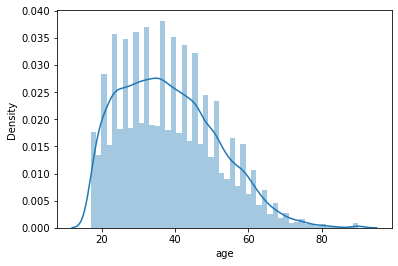

In [50]:
## checking for the age
sns.distplot(df_train6['age'])
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='education', ylabel='Density'>

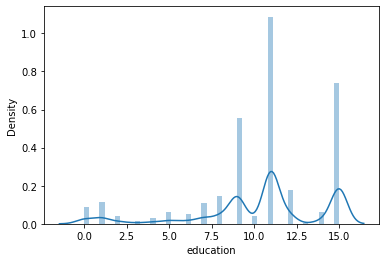

In [51]:
## checking for the education
sns.distplot(df_train6['education'])

<AxesSubplot:xlabel='education'>

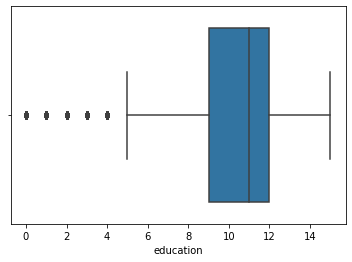

In [52]:
sns.boxplot(df_train6['education'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

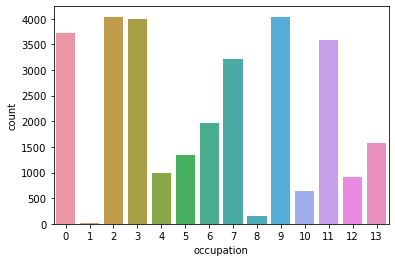

In [55]:
sns.countplot(df_train6['occupation'])

<AxesSubplot:xlabel='capitalgain', ylabel='Density'>

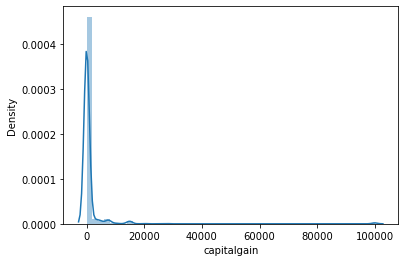

In [59]:
sns.distplot(df_train6['capitalgain'])

<AxesSubplot:xlabel='capitalloss', ylabel='Density'>

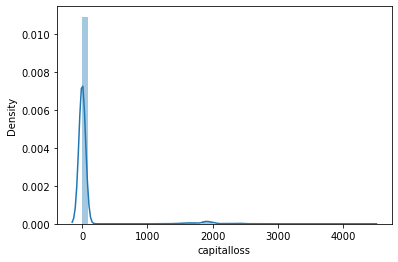

In [60]:
sns.distplot(df_train6['capitalloss'])

<AxesSubplot:xlabel='Salary', ylabel='count'>

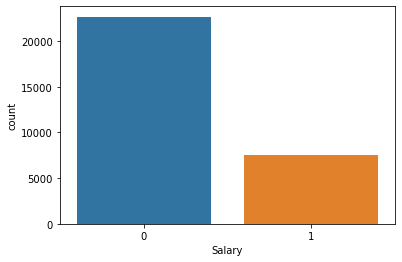

In [62]:
## checking for the target values
sns.countplot(df_train6['Salary'])

In [63]:
## Distribution of Target & feature values.
x_train=df_train6.drop(['Salary'],axis=1)
y_train=df_train6['Salary']
x_test=df_test6.drop(['Salary'],axis=1)
y_test=df_test6['Salary']

In [64]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((30161, 34), (30161,), (15060, 34), (15060,))

## Feature Scaling

In [66]:
cols = x_train.columns

In [67]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(x_train)

X_test = scaler.transform(x_test)

In [69]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [70]:
X_train.head()

,age,education,educationno,occupation,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
0,0.105263,-0.666667,0.75,-0.857143,2174.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.684211,-0.666667,0.75,-0.428571,0.0,0.0,-5.4,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.000000,-0.25,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.842105,-3.333333,-0.75,-0.142857,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0
4,-0.473684,-0.666667,0.75,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,1.0,-1.0


# Model building

## Model traning using Gaussian Naive Bayes classifier

In [72]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [73]:
## Predicting the result
y_pred = gnb.predict(X_test)

y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [74]:
## Checking accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7718


## Confusion matrix

In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[8610 2750]
 [ 686 3014]]

True Positives(TP) =  8610

True Negatives(TN) =  3014

False Positives(FP) =  2750

False Negatives(FN) =  686


<AxesSubplot:>

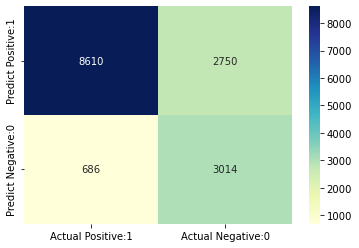

In [76]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [77]:
## checking for recall and prescion
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.83     11360
           1       0.52      0.81      0.64      3700

    accuracy                           0.77     15060
   macro avg       0.72      0.79      0.74     15060
weighted avg       0.83      0.77      0.79     15060



In [78]:
## checking for probability
y_pred_prob = gnb.predict_proba(X_test)[0:15]

y_pred_prob

array([[9.99999999e-01, 5.19299486e-10],
       [2.35908510e-01, 7.64091490e-01],
       [1.61686502e-01, 8.38313498e-01],
       [6.57969186e-14, 1.00000000e+00],
       [9.99999577e-01, 4.23323953e-07],
       [2.17324627e-04, 9.99782675e-01],
       [9.99999640e-01, 3.60125580e-07],
       [9.82828555e-01, 1.71714451e-02],
       [5.79547576e-11, 1.00000000e+00],
       [2.63858243e-02, 9.73614176e-01],
       [9.99998027e-01, 1.97284194e-06],
       [1.43482147e-03, 9.98565179e-01],
       [5.40697779e-02, 9.45930222e-01],
       [9.99999706e-01, 2.94493498e-07],
       [8.94272337e-01, 1.05727663e-01]])

In [79]:
##store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.000000e+00,5.192995e-10
1,2.359085e-01,7.640915e-01
2,1.616865e-01,8.383135e-01
3,6.579692e-14,1.000000e+00
4,9.999996e-01,4.233240e-07
5,2.173246e-04,9.997827e-01
6,9.999996e-01,3.601256e-07
7,9.828286e-01,1.717145e-02
8,5.795476e-11,1.000000e+00
9,2.638582e-02,9.736142e-01


## ROC-AUC curve

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

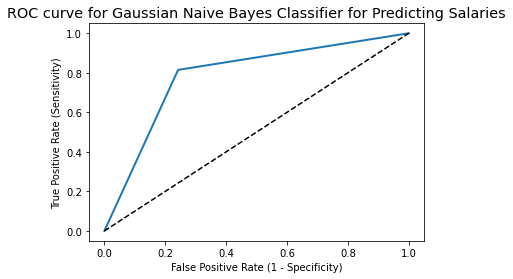

In [80]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

In [81]:
## calculating ROC-AUC curve
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7863


## Model building using Multinomial Naive Bayes classifier

In [82]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mb = MB()

In [84]:
# fit the model
classifier_mb.fit(x_train, y_train)

MultinomialNB()

In [86]:
y_pred1=classifier_mb.predict(x_test)

In [87]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))

Model accuracy score: 0.7750


In [89]:
## Confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[10891   469]
 [ 2920   780]]

True Positives(TP) =  10891

True Negatives(TN) =  780

False Positives(FP) =  469

False Negatives(FN) =  2920


<AxesSubplot:>

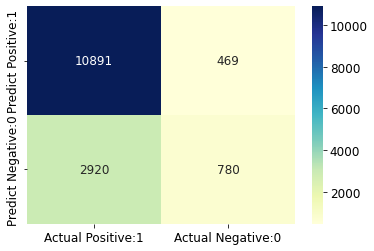

In [90]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [91]:
## checking for recall and prescion
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11360
           1       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [92]:
## checking for probability
y_pred_prob = classifier_mb.predict_proba(x_test)[0:15]

y_pred_prob

array([[1.00000000e+000, 6.02143102e-094],
       [1.00000000e+000, 3.98525279e-126],
       [1.00000000e+000, 5.63260778e-110],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 2.15696814e-090],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 3.36430138e-112],
       [1.00000000e+000, 5.15004069e-087],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.66735977e-110],
       [1.00000000e+000, 8.67332360e-100],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.01463789e-136],
       [1.00000000e+000, 7.31223143e-092],
       [1.00000000e+000, 5.21837396e-106]])

In [93]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,1.0,6.021431e-94
1,1.0,3.985253e-126
2,1.0,5.632608e-110
3,0.0,1.000000e+00
4,1.0,2.156968e-90
5,0.0,1.000000e+00
6,1.0,3.364301e-112
7,1.0,5.150041e-87
8,0.0,1.000000e+00
9,1.0,1.667360e-110


## ROC-AUC Curve

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

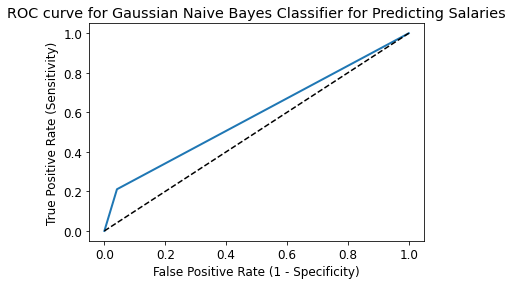

In [94]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

In [95]:
## calculating ROC-AUC curve
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5848


# Conclusion

## 1) In both cases i.e in Gaussian & multinomial naive bayes classifier gives same accuracy i.e 77%.

## 2) while in case of ROC-AUC curve Gaussian gives more score as compare to multinomial i.e 0.7863>0.5848

## 3)So Gussian naive bayes model is better than multinominal !